In [2]:
import pandas as pd

In [3]:
dataset = pd.read_json('../data/raw/company_info.jsonl', lines=True)
print (dataset.head(1))

     0       1           2             3            4              5     6   \
0  uuid  status  start_year  addr_country  addr_region  addr_province  lang   

             7      8      9      10     11       12            13  \
0  company_type  nace1  nace2  nace3  nace4  capital  capital_curr   

                   14             15                   16            17  
0  gen_assembly_month  end_fisc_year  covid_compensations  covid_primes  


In [4]:
# Stel de eerste rij in als kolomnamen
dataset.columns = dataset.iloc[0]

# Verwijder de eerste rij (die nu als kolomnamen is ingesteld)
dataset = dataset[1:]

# Herstel de index van de DataFrame
dataset = dataset.reset_index(drop=True)

# Bekijk de eerste paar rijen van de DataFrame na bewerking
print("DataFrame met nieuwe kolomnamen:")
print(dataset.head(5))

DataFrame met nieuwe kolomnamen:
0                                  uuid  status start_year addr_country  \
0  236b14ea-7b38-4c25-b46d-50257f449012  active       2011           be   
1  eb040b52-7f2b-462e-813b-becedb93964c  active       2011           be   
2  b266db0d-e86c-4664-af8a-99f56dfa3506  active       2011           be   
3  9ceb2787-7cf3-41d6-b073-c85a5571210d  active       2001           be   
4  d580d6fc-1b0a-475d-841d-8170282bfb24  active       2003           be   

0 addr_region    addr_province lang company_type  nace1  nace2  nace3  nace4  \
0    Brussels         Brussels   fr           15  56102  56102   None   None   
1    Wallonie  Walloon Brabant   fr           15  86220   None   None   None   
2    Flanders  Flemish Brabant   fr           15  62090   None   None   None   
3    Brussels         Brussels   nl           14  70220  85532  70220  74142   
4    Flanders    West Flanders   nl           15  47591  47410  47591  52487   

0 capital capital_curr gen_assembly

In [5]:
total_size = dataset.size
amount_of_columns = dataset.shape[1]

print ("totaal aantal rijen: ", total_size)
print ("aantal kolommen: ", amount_of_columns)
print ("de verschillende kolommen: ", dataset.columns)


totaal aantal rijen:  9469206
aantal kolommen:  18
de verschillende kolommen:  Index(['uuid', 'status', 'start_year', 'addr_country', 'addr_region',
       'addr_province', 'lang', 'company_type', 'nace1', 'nace2', 'nace3',
       'nace4', 'capital', 'capital_curr', 'gen_assembly_month',
       'end_fisc_year', 'covid_compensations', 'covid_primes'],
      dtype='object', name=0)


In [12]:
#outliers

outliers = [3397, 8873, 9470, 21877, 24169, 30834, 38473, 53294, 66386, 
                    85032, 88419, 113209, 178008, 182375, 199487, 214069, 217598]

# Selecteer de rijen met deze indexes
outliers_data = dataset.loc[outliers]

# Print de geselecteerde rijen
print(outliers_data.head(10))

0                                      uuid    status start_year addr_country  \
3397   19db5101-274a-4d72-b9c9-05dfdc69e627    active       2006           be   
8873   66b0adaf-a3d6-41d6-9016-533f6ff3277e    active       2006           be   
9470   4a6e88e6-fd5f-4ba9-8479-f9e000f99215    active       2007           be   
21877  7a1b09a6-4277-484f-90ed-39d7c94fd147    active       1990           be   
24169  41454229-0958-4b1e-92f8-c7d03e812184    active       1972           be   
30834  093e5f4e-4077-47c0-9401-3d0aad6b7200    active       2002           be   
38473  8267282e-c0aa-44bf-89f6-ceb1dd8155bc  inactive       1997           be   
53294  eb0d0dc4-4716-4a28-ad30-9bf385a2ecae    active       1997           be   
66386  998785d6-0612-4b63-ab0a-41d643d95f60  inactive       1994           be   
85032  a0a7aa0c-0e0d-41df-b57f-8b630bc6d5f4    active       2018           be   

0     addr_region    addr_province lang company_type  nace1  nace2  nace3  \
3397     Flanders  Flemish Brab

mediaan capital

In [6]:
median_capital = dataset['capital'].median()
avarage_capital = dataset['capital'].mean()

# Bereken het eerste kwartiel (Q1) en het derde kwartiel (Q3)
Q1 = dataset['capital'].quantile(0.25)
Q3 = dataset['capital'].quantile(0.75)
IQR = Q3 - Q1

# Print de mediaan
print("Mediaan van de kolom 'capital':", median_capital)
print("Gemiddelde van de kolom 'capital':", avarage_capital)
print("Interkwartielafstand (IQR) van de kolom 'capital':", IQR)

Mediaan van de kolom 'capital': 18600.0
Gemiddelde van de kolom 'capital': 23904102.685151834
Interkwartielafstand (IQR) van de kolom 'capital': 63900.0


Aantal lege velden

In [ ]:
empyt_values = dataset.isnull().sum()
print ("Aantal lege velden", empyt_values)

Land

In [ ]:
unieke_waarden_landen = dataset['lang'].unique()
print (unieke_waarden_landen)
print ("")
# Tel het aantal voorkomens van elk land in de kolom 'lang'
aantal_voorkomens_per_land = dataset['lang'].value_counts()
print (aantal_voorkomens_per_land)

Oprichtdatum van bedrijf (start_year)

In [ ]:
start_year = dataset['start_year'].value_counts()
topfive_start_year = start_year.tail(5)
# print (start_year)
print (topfive_start_year)

bedrijf actief of niet? (status)
3197 velden zijn niet gevuld. (na), zijn dat bedrijven die failiet zijn ofzoiets dergelijks?

In [ ]:
bedrijf_actief = dataset['status'].value_counts()
print (bedrijf_actief)

Provincie waarin het bedrijf gevestigd is

In [ ]:
provincies = dataset['addr_province'].value_counts()
print (provincies)

In [ ]:
company_type = dataset['company_type'].value_counts()
print (company_type.head(20))

In [9]:
# Indexen die je wilt filteren
selected_indices = [3397, 8873, 9470, 21877, 24169, 30834, 38473, 53294, 66386]
# selected_indices = [85032, 88419, 113209, 178008, 182375, 199487, 214069, 217598]

# Filter de DataFrame op basis van de geselecteerde indexen
filtered_data = dataset.loc[selected_indices]

# Print de gefilterde DataFrame
print(filtered_data['capital'])

3397       18600
8873       18600
9470       25000
21877    1500000
24169      62000
30834      18600
38473     111208
53294     750000
66386      18592
Name: capital, dtype: object


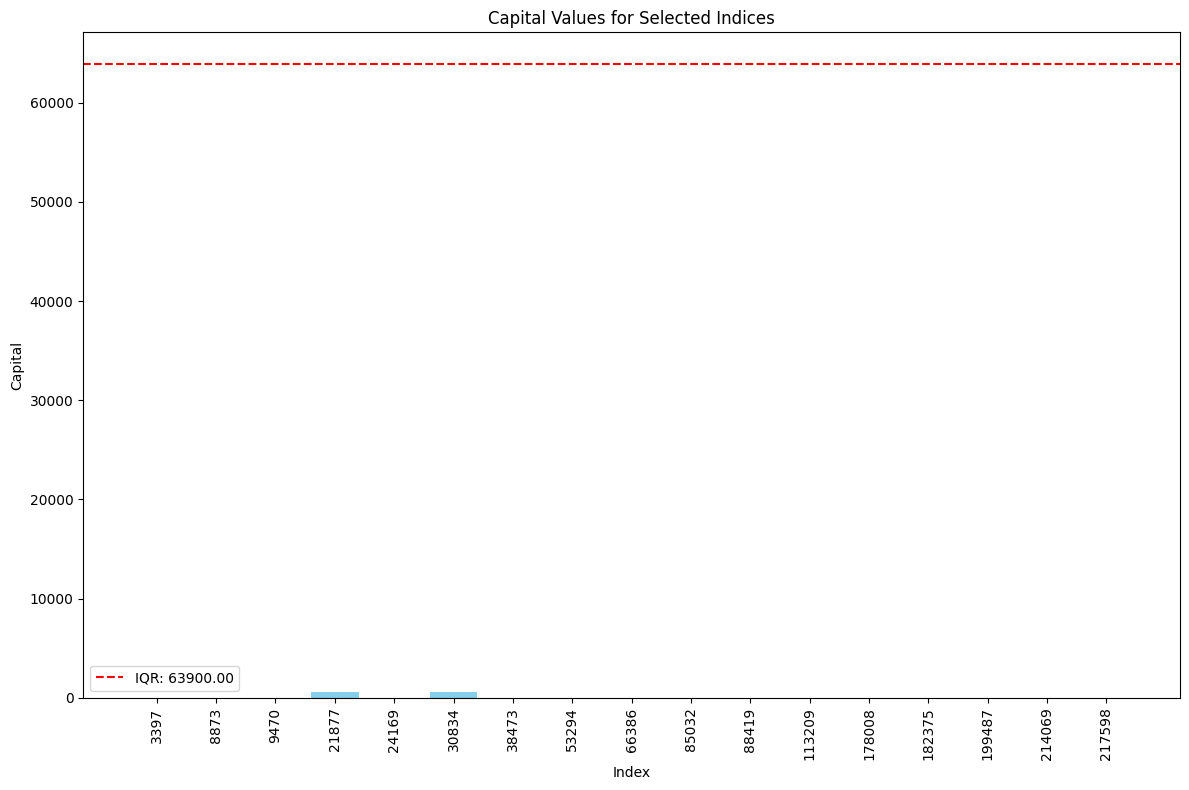

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Bereken de mediaan van de 'capital' kolom
median_capital = dataset['capital'].median()

# Indexen die je wilt filteren
selected_indices = [3397, 8873, 9470, 21877, 24169, 30834, 38473, 53294, 66386, 
                    85032, 88419, 113209, 178008, 182375, 199487, 214069, 217598]

# Filter de DataFrame op basis van de geselecteerde indexen
filtered_data = dataset.loc[selected_indices]

# Visualiseer de 'capital' kolom
plt.figure(figsize=(12, 8))
bars = plt.bar(filtered_data.index.astype(str), filtered_data['capital'], color='skyblue')

# Voeg een lijn voor de IQR toe
plt.axhline(y=IQR, color='r', linestyle='--', label=f'IQR: {IQR:.2f}')

# Labels en titel
plt.xlabel('Index')
plt.ylabel('Capital')
plt.title('Capital Values for Selected Indices')
plt.xticks(rotation=90)  # Draai de x-labels voor betere leesbaarheid
plt.legend()  # Voeg een legenda toe
plt.tight_layout()  # Zorg ervoor dat alles netjes in de figuur past

# Toon de plot
plt.show()